# Práctica 4 (Parte 2): Análisis en componentes principales (PCA)

+ __Estudiante 1:__
+ __Estudiante 2:__


# 0. Librerías.

In [1]:
#Librerías de interés.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## 1. Datos de entrada

Vamos a utilizar un subconjunto muy pequeño del conjunto de datos MNIST que Kaggle aloja en su repositorio (https://www.kaggle.com/oddrationale/mnist-in-csv). Utilizaremos un archivo para entrenamiento y otro diferente para pruebas: "mnist_train_small.csv", y "mnist_test_small.csv", respectivamente. Cada una de las filas de estos conjuntos de datos tiene 785 columnas. La primera columna se denomina 'label' y corresponde a la categoría que es un número entre 0 y 9. Las 784 columnas restantes corresponden a los valores de los píxeles de una imagen cuadrada de 28x28 en escala de grises, donde cada píxel sólo puede tomar valores entre 0 y 255. 

In [2]:
# Vamos a leer el conjunto de datos en un dataframe de pandas.

df = pd.read_csv('../Datasets/mnist_train_small.csv')

## 2. Análisis Exploratorio

In [3]:
df.shape

(1000, 785)

El conjunto de datos tiene 1000 observaciones
Nombres de las columnas: 
Index(['label', '1x1', '1x2', '1x3', '1x4', '1x5', '1x6', '1x7', '1x8', '1x9',
       ...
       '28x19', '28x20', '28x21', '28x22', '28x23', '28x24', '28x25', '28x26',
       '28x27', '28x28'],
      dtype='object', length=785)

Tipos de datos de cada columna: 
label    int64
1x1      int64
1x2      int64
1x3      int64
1x4      int64
         ...  
28x24    int64
28x25    int64
28x26    int64
28x27    int64
28x28    int64
Length: 785, dtype: object



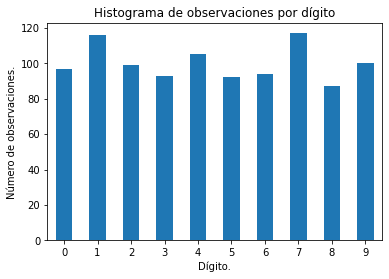

In [4]:
#¿Cuántas observaciones tenemos?
print('El conjunto de datos tiene {} observaciones'.format(df.shape[0]))  #Número de filas. 

#Revisemos los encabezados
print('Nombres de las columnas: \n', df.columns,'\n',sep='')

#Revisemos algunos atributos del conjunto de datos. 
print('Tipos de datos de cada columna: \n', df.dtypes,'\n',sep='')

#La salida es la columna 0 que corresponde a 'label'.
#Las columnas de la 1 hasta la última corresponden a los valores de píxeles en posiciones específicas (fila, columna) de una matriz cuadrada de 28 x 28 elementos. 
plt.figure
plt.hist(df['label'],bins=list(np.arange(-0.5,10.0,0.5)),align='left')
plt.xlim(-0.5,9.5)
plt.xticks(list(np.arange(0,10,1)));
plt.xlabel('Dígito.')
plt.ylabel('Número de observaciones.')
plt.title('Histograma de observaciones por dígito')
plt.show()



La salida deseada es 5.


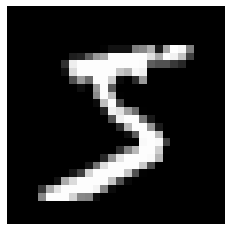


La salida deseada es 0.


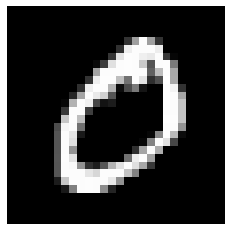


La salida deseada es 4.


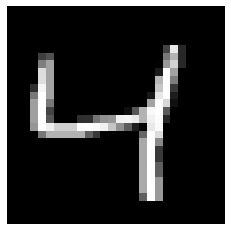

In [5]:
# Revisemos cómo se ven algunas de las observaciones cuando las graficamos como imágenes.
observaciones_a_visualizar = 3 #Número de observaciones a visualizar del conjunto de datos. 

for obs_number in range(observaciones_a_visualizar):
  output_of_single_observation = df.iloc[obs_number,0]   #Se extrae la salida correspondiente
  print('\nLa salida deseada es {}.'.format(output_of_single_observation))
  
  features_of_single_observation = df.iloc[obs_number,1:].values.reshape((28,28))   #Se extraen los atributos de entrada y se les cambia la forma, 
                                                                                    #de un vector fila a un arreglo cuadrado, note que np.sqrt(784)=28.
  plt.figure()
  plt.imshow(features_of_single_observation,cmap='gray') #Se grafica como una imagen en escala de grises. 
  plt.axis('off') #Esta instrucción quita los ejes x e y. 
  plt.show()

# 3. Modelo y 4. Evaluación

### Preparación de los Datos

### Ejercicio 1

Normalice los valores de todas las imágenes entre 0 y 1. Esto se puede lograr dividiendo toda la imagen entre 255.

### Ejercicio 2

Particione los datos en los conjuntos de entrenamiento y prueba.

### Ejercicio 3

Construya tres modelos de clasificación:

- KNN
- Regresión Logística
- Random Forests

Ajuste los hiperparámetros para cada uno de ellos. Puede usar Repeated Stratified Cross-Validation para evaluar la calidad de cada modelo. Consigne sus observaciones.

Entrene y evalúe el desempeño del modelo por clase (en los conjuntos de entrenamiento y prueba) usando las métricas:

- Accuracy
- Precision
- Recall
- F1 score

Evalúe el desempeño general del modelo (en los conjuntos de entrenamiento y prueba) usando las métricas:

- Average Accuracy
- Average Precision
- Average Recall
- Average F1 score

Consigne sus observaciones, por ejemplo, cuáles números se clasifican mejor, etc.

### Ejercicio 4

Haga el Análisis de Componentes Principales (PCA) para el conjunto de datos MNIST y escoja el conjunto de componentes que considere más adecuado.

### Ejercicio 5

Usando el conjunto de datos transformados mediante PCA repita el ejercicio Ejercicio 3.

### Ejercicio 6

Compare los resultados obtenidos usando el conjunto de datos transformados mediante PCA y los obtenidos con el conjunto de datos original. Compare también los tiempos de ejecución.